In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
import zipfile
from pathlib import Path
import gdown
from ultralytics import YOLO
import yaml
import cv2
from random import sample
import matplotlib.pyplot as plt
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
google_drive_file_id = '10JylvIoTHO3hV8-aOnVlKIAzb_gZJfRN'  # <-- From sharing link in google drive, https://drive.google.com/file/d/10JylvIoTHO3hV8-aOnVlKIAzb_gZJfRN/view?usp=drive_link
google_drive_file_name = '20250616_mju_waste_yolo_2475.zip'
project_root = Path('/content')
dataset_root_name = 'yolo_dataset'
output_path = project_root / google_drive_file_name
extract_dir = project_root / dataset_root_name
dataset_root_path = Path('/content') / dataset_root_name
yaml_path = dataset_root_path / 'data.yaml'


In [7]:
print("working dir is " + str(dataset_root_path))

working dir is /content/yolo_dataset


In [5]:
# download from Google Drive and extract
gdown.download(id=google_drive_file_id, output=str(output_path), quiet=False)
print(f"Dataset downloaded from google drive: {output_path}\n")

print("Extracting...\n")
with zipfile.ZipFile(output_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print(f"Dataset extracted to: {extract_dir}\n", )

Downloading...
From (original): https://drive.google.com/uc?id=10JylvIoTHO3hV8-aOnVlKIAzb_gZJfRN
From (redirected): https://drive.google.com/uc?id=10JylvIoTHO3hV8-aOnVlKIAzb_gZJfRN&confirm=t&uuid=dc0c1c10-5619-4789-ae4a-9e0f27805c97
To: /content/20250616_mju_waste_yolo_2475.zip
100%|██████████| 1.27G/1.27G [00:13<00:00, 96.3MB/s]


Dataset downloaded from google drive: /content/20250616_mju_waste_yolo_2475.zip

Extracting...

Dataset extracted to: /content/yolo_dataset



In [ ]:
  # if nessecary delete the old data.yaml
  os.remove(dataset_root_path / 'data.yaml')
  print(f"Deleted file: {dataset_root_path / 'data.yaml'}")

Deleted file: /content/yolo_dataset/data.yaml


In [8]:
# update root path
dataset_root_path = Path('/content') / dataset_root_name / "20250616_mju_waste_yolo_2475"
dataset_root_path

PosixPath('/content/yolo_dataset/20250616_mju_waste_yolo_2475')

In [9]:
# create updated data.yaml
categories = [{'id': 0, 'name': 'trash'}]  # Replace this with your actual categories

train_path = dataset_root_path / 'images' / 'train'
val_path = dataset_root_path / 'images' / 'val'
test_path = dataset_root_path / 'images' / 'test'
# Build the data dictionary
data = {
    'train': str(train_path),
    'val': str(val_path),
    'test': str(test_path),
    'nc': len(categories),
    'names': [cat['name'] for cat in categories]
}

with open(dataset_root_path / 'data.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("data.yaml created successfully.")


data.yaml created successfully.


In [11]:
# Sanity check that it's possible to train a model with the dataset
dataset_yaml = Path(dataset_root_path / 'data.yaml')
model = YOLO('yolo11n.pt')
results = model.train(data=str(dataset_yaml), epochs=1, imgsz=640)

print(f"Training complete. Results saved to: {model.trainer.save_dir}")

100%|██████████| 5.35M/5.35M [00:00<00:00, 74.5MB/s]


Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolo_dataset/20250616_mju_waste_yolo_2475/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, pl

100%|██████████| 755k/755k [00:00<00:00, 22.3MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

 23        [16, 19, 22]  1    430867  ultralytics.nn.modules.head.Detect           [1, [64, 128, 256]]           
YOLO11n summary: 181 layers, 2,590,035 parameters, 2,590,019 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2847.8±753.9 MB/s, size: 502.2 KB)


train: Scanning /content/yolo_dataset/20250616_mju_waste_yolo_2475/labels/train... 1980 images, 6 backgrounds, 0 corrupt: 100%|██████████| 1980/1980 [00:02<00:00, 857.71it/s]


train: New cache created: /content/yolo_dataset/20250616_mju_waste_yolo_2475/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1488.3±1183.2 MB/s, size: 511.2 KB)


val: Scanning /content/yolo_dataset/20250616_mju_waste_yolo_2475/labels/val... 247 images, 0 backgrounds, 0 corrupt: 100%|██████████| 247/247 [00:00<00:00, 437.05it/s]

val: New cache created: /content/yolo_dataset/20250616_mju_waste_yolo_2475/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      2.28G      1.139      2.204      1.149         21        640: 100%|██████████| 124/124 [00:45<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        247        259      0.818      0.746      0.814      0.519

1 epochs completed in 0.015 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]


                   all        247        259      0.815      0.749      0.814      0.519
Speed: 0.3ms preprocess, 2.7ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to runs/detect/train
Training complete. Results saved to: runs/detect/train


In [12]:
# Get the latest results
runs_detect_dir = Path('runs/detect')
train_dirs = [d for d in runs_detect_dir.iterdir() if d.is_dir() and d.name.startswith("train")]
train_dirs.sort(key=lambda d: d.stat().st_mtime, reverse=True)  # sort by modification time
latest_train_dir = train_dirs[0]
print(latest_train_dir)

best_model_path = latest_train_dir / 'weights' / 'best.pt'
print(f"Loading {best_model_path}")


runs/detect/train
Loading runs/detect/train/weights/best.pt



image 1/1 /content/yolo_dataset/20250616_mju_waste_yolo_2475/images/train/mju_waste_000551.jpg: 480x640 (no detections), 43.6ms
Speed: 1.6ms preprocess, 43.6ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


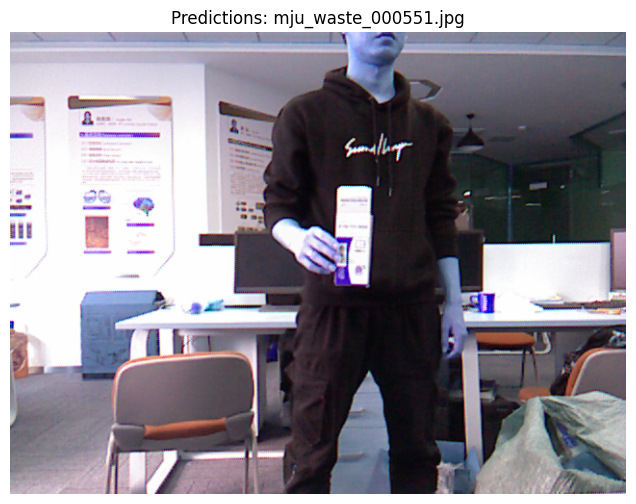


image 1/1 /content/yolo_dataset/20250616_mju_waste_yolo_2475/images/train/mju_waste_000042.jpg: 480x640 1 trash, 16.5ms
Speed: 4.1ms preprocess, 16.5ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)


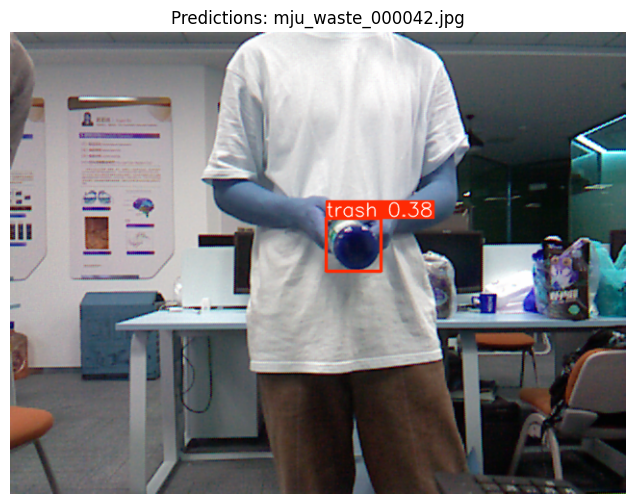


image 1/1 /content/yolo_dataset/20250616_mju_waste_yolo_2475/images/train/mju_waste_000714.jpg: 480x640 1 trash, 46.4ms
Speed: 4.0ms preprocess, 46.4ms inference, 4.2ms postprocess per image at shape (1, 3, 480, 640)


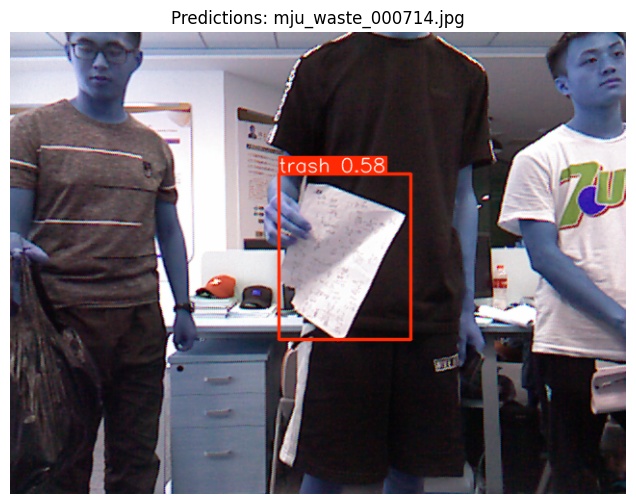


image 1/1 /content/yolo_dataset/20250616_mju_waste_yolo_2475/images/train/mju_waste_000245.jpg: 480x640 1 trash, 43.2ms
Speed: 7.3ms preprocess, 43.2ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


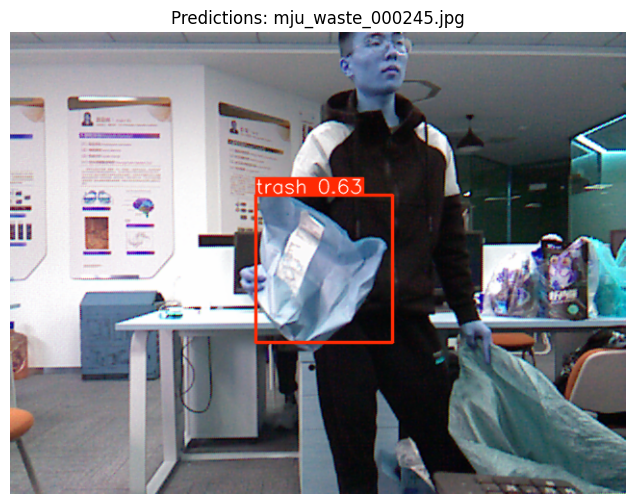


image 1/1 /content/yolo_dataset/20250616_mju_waste_yolo_2475/images/train/mju_waste_001091.jpg: 480x640 1 trash, 20.0ms
Speed: 2.0ms preprocess, 20.0ms inference, 3.8ms postprocess per image at shape (1, 3, 480, 640)


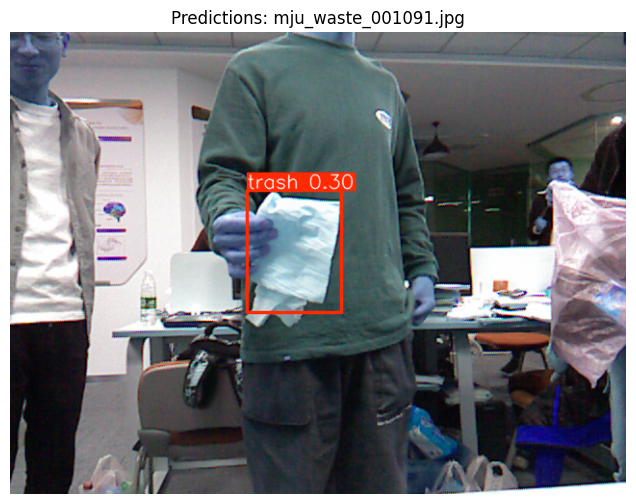


image 1/1 /content/yolo_dataset/20250616_mju_waste_yolo_2475/images/train/mju_waste_000563.jpg: 480x640 1 trash, 13.2ms
Speed: 2.1ms preprocess, 13.2ms inference, 5.3ms postprocess per image at shape (1, 3, 480, 640)


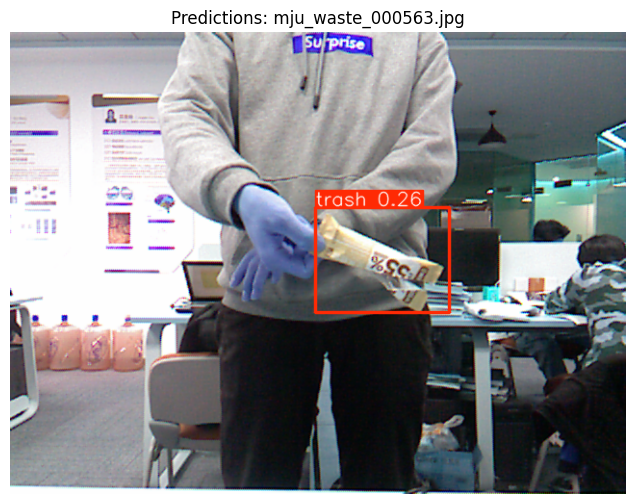


image 1/1 /content/yolo_dataset/20250616_mju_waste_yolo_2475/images/train/mju_waste_000539.jpg: 480x640 2 trashs, 15.9ms
Speed: 2.4ms preprocess, 15.9ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)


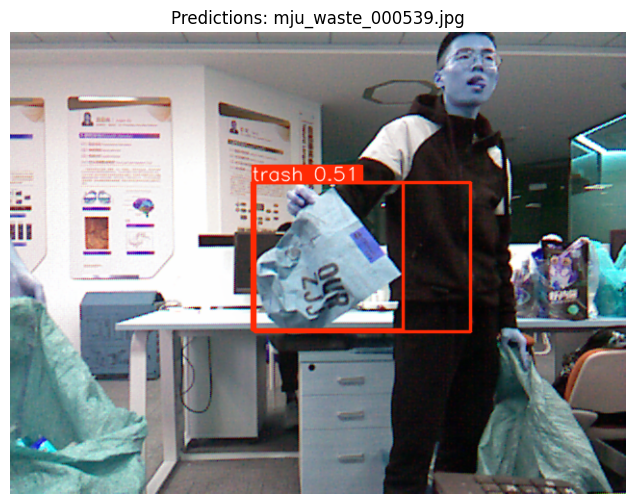


image 1/1 /content/yolo_dataset/20250616_mju_waste_yolo_2475/images/train/mju_waste_001056.jpg: 480x640 1 trash, 18.3ms
Speed: 2.2ms preprocess, 18.3ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


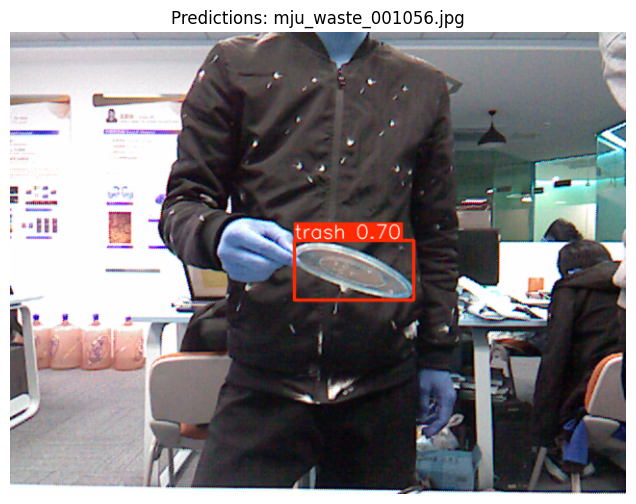


image 1/1 /content/yolo_dataset/20250616_mju_waste_yolo_2475/images/train/mju_waste_001979.jpg: 480x640 (no detections), 15.4ms
Speed: 4.2ms preprocess, 15.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


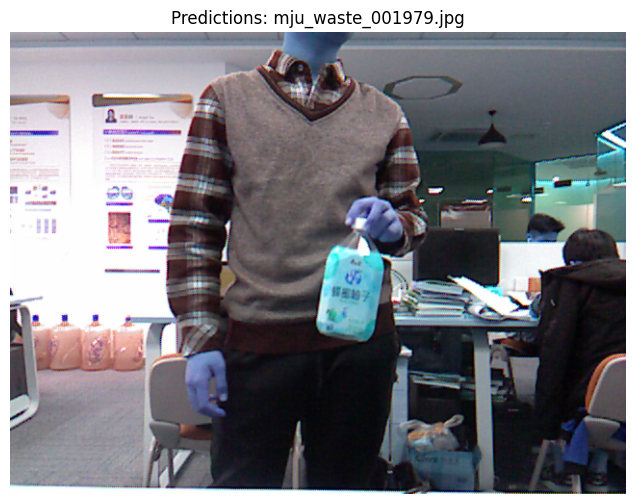


image 1/1 /content/yolo_dataset/20250616_mju_waste_yolo_2475/images/train/mju_waste_001059.jpg: 480x640 1 trash, 19.8ms
Speed: 5.2ms preprocess, 19.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


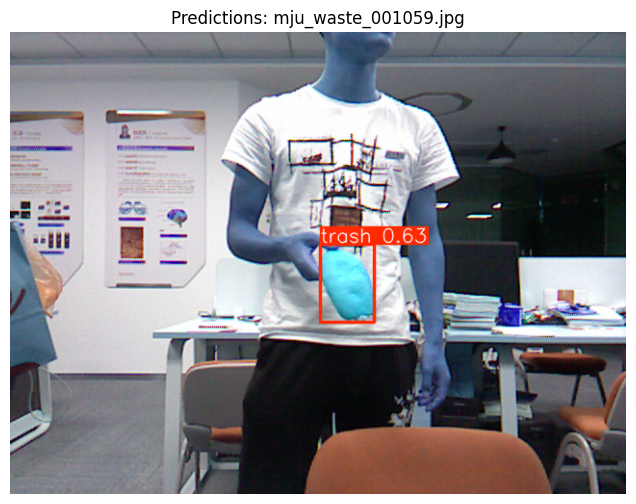

In [15]:
# Load the model and try it out
model = YOLO(best_model_path)
train_images_path = dataset_root_path / "images" / "train"
image_files = list(train_images_path.glob('*.jpg'))

sample_images = sample(image_files, 10)

for image_path in sample_images:
    result = model(image_path)[0]
    annotated_image = result.plot()

    plt.figure(figsize=(8, 6))
    plt.imshow(annotated_image)
    plt.title(f'Predictions: {image_path.name}')
    plt.axis('off')
    plt.show()